In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns; sns.set()
from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Bidirectional

from keras.utils.vis_utils import plot_model
from keras.utils.np_utils import to_categorical
from keras.utils import np_utils

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
number_of_samples = 2500000

In [ ]:
data_attack = pd.read_csv('/content/drive/MyDrive/dataset_attack.csv', nrows = number_of_samples)

In [ ]:
data_attack

,frame.len,ip.hdr_len,ip.len,ip.flags.rb,ip.flags.df,p.flags.mf,ip.frag_offset,ip.ttl,ip.proto,tcp.srcport,...,tcp.flags.ecn,tcp.flags.urg,tcp.flags.ack,tcp.flags.push,tcp.flags.reset,tcp.flags.syn,tcp.flags.fin,tcp.window_size,tcp.time_delta,class
1,212,20,198,0,0,0,0,112,17,0,...,0,0,0,0,0,0,0,0,0.000000,attack
1,212,20,198,0,0,0,0,112,17,0,...,0,0,0,0,0,0,0,0,0.000000,attack
1,212,20,198,0,0,0,0,112,17,0,...,0,0,0,0,0,0,0,0,0.000000,attack
1,212,20,198,0,0,0,0,112,17,0,...,0,0,0,0,0,0,0,0,0.000000,attack
1,62,20,48,0,0,0,0,128,17,0,...,0,0,0,0,0,0,0,0,0.000000,attack
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,1514,20,1500,0,1,0,0,128,6,3943,...,0,0,1,0,0,0,0,17520,0.001098,attack
1,60,20,40,0,1,0,0,64,6,30285,...,0,0,1,0,0,0,0,65535,0.000236,attack
1,60,20,40,0,1,0,0,63,6,30285,...,0,0,1,0,0,0,0,65535,0.000161,attack
1,1514,20,1500,0,1,0,0,128,6,3943,...,0,0,1,0,0,0,0,17520,0.000830,attack


In [ ]:
data_attack.corr()

,frame.len,ip.hdr_len,ip.len,ip.flags.rb,ip.flags.df,p.flags.mf,ip.frag_offset,ip.ttl,ip.proto,tcp.srcport,...,tcp.flags.cwr,tcp.flags.ecn,tcp.flags.urg,tcp.flags.ack,tcp.flags.push,tcp.flags.reset,tcp.flags.syn,tcp.flags.fin,tcp.window_size,tcp.time_delta
frame.len,1.000000,0.021779,0.999992,NaN,0.251807,0.002959,0.000490,0.035893,-0.214799,-0.242006,...,-0.000969,-0.001118,NaN,0.227952,-0.034639,-0.030390,-0.084237,-0.073595,-0.262797,-0.039092
ip.hdr_len,0.021779,1.000000,0.023694,NaN,0.040677,0.000057,0.000054,0.072183,0.045810,0.016423,...,0.000027,0.000032,NaN,0.042156,0.007212,0.000860,0.002390,0.002418,0.022936,0.001405
ip.len,0.999992,0.023694,1.000000,NaN,0.249642,0.002958,0.000495,0.036962,-0.212423,-0.243278,...,-0.000973,-0.001123,NaN,0.225700,-0.033686,-0.030510,-0.083745,-0.073842,-0.264631,-0.039178
ip.flags.rb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ip.flags.df,0.251807,0.040677,0.249642,NaN,1.000000,-0.003711,-0.003513,-0.262074,-0.891079,0.308111,...,-0.001783,-0.002059,NaN,0.884912,0.112852,0.003898,0.049961,0.056534,0.468179,0.023710
p.flags.mf,0.002959,0.000057,0.002958,NaN,-0.003711,1.000000,0.177079,-0.001981,0.003912,-0.001498,...,-0.000002,-0.000003,NaN,-0.003846,-0.000658,-0.000078,-0.000218,-0.000221,-0.002093,-0.000128
ip.frag_offset,0.000490,0.000054,0.000495,NaN,-0.003513,0.177079,1.000000,-0.001833,0.003703,-0.001418,...,-0.000002,-0.000003,NaN,-0.003641,-0.000623,-0.000074,-0.000206,-0.000209,-0.001981,-0.000121
ip.ttl,0.035893,0.072183,0.036962,NaN,-0.262074,-0.001981,-0.001833,1.000000,0.287142,-0.468041,...,0.004443,0.005130,NaN,-0.287599,-0.057514,-0.004699,0.002658,0.010431,-0.368842,0.033818
ip.proto,-0.214799,0.045810,-0.212423,NaN,-0.891079,0.003912,0.003703,0.287142,1.000000,-0.381202,...,-0.000636,-0.000734,NaN,-0.978515,-0.167406,-0.019951,-0.055466,-0.056118,-0.532385,-0.032622
tcp.srcport,-0.242006,0.016423,-0.243278,NaN,0.308111,-0.001498,-0.001418,-0.468041,-0.381202,1.000000,...,0.002593,0.002994,NaN,0.384307,0.084533,0.004318,-0.025903,-0.028176,0.736621,-0.006194


In [ ]:
data_normal = pd.read_csv('/content/drive/MyDrive/dataset_normal.csv', nrows = number_of_samples)

In [ ]:
data_normal

,frame.len,ip.hdr_len,ip.len,ip.flags.rb,ip.flags.df,p.flags.mf,ip.frag_offset,ip.ttl,ip.proto,tcp.srcport,...,tcp.flags.ecn,tcp.flags.urg,tcp.flags.ack,tcp.flags.push,tcp.flags.reset,tcp.flags.syn,tcp.flags.fin,tcp.window_size,tcp.time_delta,class
1,206,20,192,0,1,0,0,128,6,4175,...,0,0,1,1,0,0,0,16697,0.000000,normal
1,60,20,40,0,1,0,0,64,6,22,...,0,0,1,0,0,0,0,7504,0.000537,normal
1,60,20,40,0,1,0,0,63,6,22,...,0,0,1,0,0,0,0,7504,0.000155,normal
1,774,20,760,0,1,0,0,64,6,22,...,0,0,1,1,0,0,0,7504,0.004483,normal
1,774,20,760,0,1,0,0,63,6,22,...,0,0,1,1,0,0,0,7504,0.001321,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,78,20,64,0,1,0,0,64,6,21,...,0,0,1,1,0,0,0,5840,0.001732,normal
1,1434,20,1420,0,1,0,0,113,6,80,...,0,0,1,0,0,0,0,64207,0.004024,normal
1,60,20,40,0,1,0,0,63,6,59815,...,0,0,1,0,0,0,0,5840,0.000302,normal
1,78,20,64,0,1,0,0,63,6,21,...,0,0,1,1,0,0,0,5840,0.000256,normal


In [ ]:
data_attack.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500000 entries, 1 to 1
Data columns (total 26 columns):
 #   Column           Dtype  
---  ------           -----  
 0   frame.len        int64  
 1   ip.hdr_len       int64  
 2   ip.len           int64  
 3   ip.flags.rb      int64  
 4   ip.flags.df      int64  
 5   p.flags.mf       int64  
 6   ip.frag_offset   int64  
 7   ip.ttl           int64  
 8   ip.proto         int64  
 9   tcp.srcport      int64  
 10  tcp.dstport      int64  
 11  tcp.len          int64  
 12  tcp.ack          int64  
 13  tcp.flags.res    int64  
 14  tcp.flags.ns     int64  
 15  tcp.flags.cwr    int64  
 16  tcp.flags.ecn    int64  
 17  tcp.flags.urg    int64  
 18  tcp.flags.ack    int64  
 19  tcp.flags.push   int64  
 20  tcp.flags.reset  int64  
 21  tcp.flags.syn    int64  
 22  tcp.flags.fin    int64  
 23  tcp.window_size  int64  
 24  tcp.time_delta   float64
 25  class            object 
dtypes: float64(1), int64(24), object(1)
memory usage

In [ ]:
data_normal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500000 entries, 1 to 1
Data columns (total 26 columns):
 #   Column           Dtype  
---  ------           -----  
 0   frame.len        int64  
 1   ip.hdr_len       int64  
 2   ip.len           int64  
 3   ip.flags.rb      int64  
 4   ip.flags.df      int64  
 5   p.flags.mf       int64  
 6   ip.frag_offset   int64  
 7   ip.ttl           int64  
 8   ip.proto         int64  
 9   tcp.srcport      int64  
 10  tcp.dstport      int64  
 11  tcp.len          int64  
 12  tcp.ack          int64  
 13  tcp.flags.res    int64  
 14  tcp.flags.ns     int64  
 15  tcp.flags.cwr    int64  
 16  tcp.flags.ecn    int64  
 17  tcp.flags.urg    int64  
 18  tcp.flags.ack    int64  
 19  tcp.flags.push   int64  
 20  tcp.flags.reset  int64  
 21  tcp.flags.syn    int64  
 22  tcp.flags.fin    int64  
 23  tcp.window_size  int64  
 24  tcp.time_delta   float64
 25  class            object 
dtypes: float64(1), int64(24), object(1)
memory usage

In [ ]:
data_normal.isnull().sum() 

frame.len          0
ip.hdr_len         0
ip.len             0
ip.flags.rb        0
ip.flags.df        0
p.flags.mf         0
ip.frag_offset     0
ip.ttl             0
ip.proto           0
tcp.srcport        0
tcp.dstport        0
tcp.len            0
tcp.ack            0
tcp.flags.res      0
tcp.flags.ns       0
tcp.flags.cwr      0
tcp.flags.ecn      0
tcp.flags.urg      0
tcp.flags.ack      0
tcp.flags.push     0
tcp.flags.reset    0
tcp.flags.syn      0
tcp.flags.fin      0
tcp.window_size    0
tcp.time_delta     0
class              0
dtype: int64

In [ ]:
data_normal.isnull().sum() 

frame.len          0
ip.hdr_len         0
ip.len             0
ip.flags.rb        0
ip.flags.df        0
p.flags.mf         0
ip.frag_offset     0
ip.ttl             0
ip.proto           0
tcp.srcport        0
tcp.dstport        0
tcp.len            0
tcp.ack            0
tcp.flags.res      0
tcp.flags.ns       0
tcp.flags.cwr      0
tcp.flags.ecn      0
tcp.flags.urg      0
tcp.flags.ack      0
tcp.flags.push     0
tcp.flags.reset    0
tcp.flags.syn      0
tcp.flags.fin      0
tcp.window_size    0
tcp.time_delta     0
class              0
dtype: int64

In [ ]:
data_normal.columns

Index(['frame.len', 'ip.hdr_len', 'ip.len', 'ip.flags.rb', 'ip.flags.df',
       'p.flags.mf', 'ip.frag_offset', 'ip.ttl', 'ip.proto', 'tcp.srcport',
       'tcp.dstport', 'tcp.len', 'tcp.ack', 'tcp.flags.res', 'tcp.flags.ns',
       'tcp.flags.cwr', 'tcp.flags.ecn', 'tcp.flags.urg', 'tcp.flags.ack',
       'tcp.flags.push', 'tcp.flags.reset', 'tcp.flags.syn', 'tcp.flags.fin',
       'tcp.window_size', 'tcp.time_delta', 'class'],
      dtype='object')

In [ ]:
data_normal.columns=[ 'frame.len', 'frame.protocols', 'ip.hdr_len',
       'ip.len', 'ip.flags.rb', 'ip.flags.df', 'p.flags.mf', 'ip.frag_offset',
       'ip.ttl', 'ip.proto', 'ip.src', 'ip.dst', 'tcp.srcport', 'tcp.dstport',
       'tcp.len', 'tcp.ack', 'tcp.flags.res', 'tcp.flags.ns', 'tcp.flags.cwr',
       'tcp.flags.ecn', 'tcp.flags.urg', 'tcp.flags.ack', 'tcp.flags.push',
       'tcp.flags.reset', 'tcp.flags.syn', 'tcp.flags.fin', 'tcp.window_size',
       'tcp.time_delta','class']
data_attack.columns=[ 'frame.len', 'frame.protocols', 'ip.hdr_len',
       'ip.len', 'ip.flags.rb', 'ip.flags.df', 'p.flags.mf', 'ip.frag_offset',
       'ip.ttl', 'ip.proto', 'ip.src', 'ip.dst', 'tcp.srcport', 'tcp.dstport',
       'tcp.len', 'tcp.ack', 'tcp.flags.res', 'tcp.flags.ns', 'tcp.flags.cwr',
       'tcp.flags.ecn', 'tcp.flags.urg', 'tcp.flags.ack', 'tcp.flags.push',
       'tcp.flags.reset', 'tcp.flags.syn', 'tcp.flags.fin', 'tcp.window_size',
       'tcp.time_delta','class']

In [ ]:
data_normal=data_normal.drop(['ip.src', 'ip.dst','frame.protocols'],axis=1)
data_attack=data_attack.drop(['ip.src', 'ip.dst','frame.protocols'],axis=1)

In [ ]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

data_normal.corr()


,frame.len,ip.hdr_len,ip.len,ip.flags.rb,ip.flags.df,p.flags.mf,ip.frag_offset,ip.ttl,ip.proto,tcp.srcport,...,tcp.flags.cwr,tcp.flags.ecn,tcp.flags.urg,tcp.flags.ack,tcp.flags.push,tcp.flags.reset,tcp.flags.syn,tcp.flags.fin,tcp.window_size,tcp.time_delta
frame.len,1.000000,0.041278,0.999990,NaN,0.015476,NaN,NaN,-0.358981,-0.100435,-0.110947,...,NaN,NaN,NaN,0.177709,-0.120033,-0.068295,-0.168025,-0.163433,-0.185334,-0.039001
ip.hdr_len,0.041278,1.000000,0.044435,NaN,0.207652,NaN,NaN,0.085581,0.175499,0.017441,...,NaN,NaN,NaN,0.213671,0.018145,0.003008,0.007425,0.008025,0.012195,0.001877
ip.len,0.999990,0.044435,1.000000,NaN,0.015559,NaN,NaN,-0.358886,-0.099098,-0.111130,...,NaN,NaN,NaN,0.177424,-0.118248,-0.068449,-0.166937,-0.163699,-0.185684,-0.039001
ip.flags.rb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ip.flags.df,0.015476,0.207652,0.015559,NaN,1.000000,NaN,NaN,-0.069127,-0.616717,0.081125,...,NaN,NaN,NaN,0.506905,0.024786,-0.017659,0.008520,0.026159,0.049728,0.007645
p.flags.mf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ip.frag_offset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ip.ttl,-0.358981,0.085581,-0.358886,NaN,-0.069127,NaN,NaN,1.000000,-0.034802,0.146475,...,NaN,NaN,NaN,0.012172,0.046956,-0.024081,0.017151,0.036588,-0.064078,0.020508
ip.proto,-0.100435,0.175499,-0.099098,NaN,-0.616717,NaN,NaN,-0.034802,1.000000,-0.052173,...,NaN,NaN,NaN,-0.639187,-0.054281,-0.008999,-0.022211,-0.024007,-0.036480,-0.005616
tcp.srcport,-0.110947,0.017441,-0.111130,NaN,0.081125,NaN,NaN,0.146475,-0.052173,1.000000,...,NaN,NaN,NaN,0.042254,-0.035064,-0.003964,-0.013165,-0.013859,0.354387,-0.000476


In [ ]:
data_normal.describe()

,frame.len,ip.hdr_len,ip.len,ip.flags.rb,ip.flags.df,p.flags.mf,ip.frag_offset,ip.ttl,ip.proto,tcp.srcport,...,tcp.flags.cwr,tcp.flags.ecn,tcp.flags.urg,tcp.flags.ack,tcp.flags.push,tcp.flags.reset,tcp.flags.syn,tcp.flags.fin,tcp.window_size,tcp.time_delta
count,2.500000e+06,2.500000e+06,2.500000e+06,2500000.0,2.500000e+06,2500000.0,2500000.0,2.500000e+06,2.500000e+06,2.500000e+06,...,2500000.0,2500000.0,2500000.0,2.500000e+06,2.500000e+06,2.500000e+06,2.500000e+06,2.500000e+06,2.500000e+06,2.500000e+06
mean,7.306954e+02,1.996312e+01,7.143994e+02,0.0,9.590056e-01,0.0,0.0,9.234740e+01,6.194743e+00,5.233821e+03,...,0.0,0.0,0.0,9.611944e-01,1.515592e-01,4.885200e-03,2.904000e-02,3.376040e-02,5.978459e+04,5.564201e-01
std,6.880777e+02,8.589466e-01,6.903196e+02,0.0,1.982773e-01,0.0,0.0,4.632814e+01,1.516324e+00,1.288388e+04,...,0.0,0.0,0.0,1.931314e-01,3.585932e-01,6.972329e-02,1.679187e-01,1.806119e-01,2.104782e+05,1.272469e+01
min,6.000000e+01,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.000000e+01,2.000000e+01,4.000000e+01,0.0,1.000000e+00,0.0,0.0,5.000000e+01,6.000000e+00,8.000000e+01,...,0.0,0.0,0.0,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.840000e+03,1.101000e-03
50%,2.210000e+02,2.000000e+01,2.070000e+02,0.0,1.000000e+00,0.0,0.0,6.400000e+01,6.000000e+00,8.000000e+01,...,0.0,0.0,0.0,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.731900e+04,2.304000e-03
75%,1.464000e+03,2.000000e+01,1.450000e+03,0.0,1.000000e+00,0.0,0.0,1.280000e+02,6.000000e+00,2.453000e+03,...,0.0,0.0,0.0,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.388800e+04,3.999000e-03
max,1.514000e+03,2.400000e+01,1.500000e+03,0.0,1.000000e+00,0.0,0.0,2.550000e+02,1.700000e+01,6.553400e+04,...,0.0,0.0,0.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.943232e+06,7.198499e+03


In [ ]:
features=[ 'frame.len', 'ip.hdr_len',
       'ip.len', 'ip.flags.rb', 'ip.flags.df', 'p.flags.mf', 'ip.frag_offset',
       'ip.ttl', 'ip.proto', 'tcp.srcport', 'tcp.dstport',
       'tcp.len', 'tcp.ack', 'tcp.flags.res', 'tcp.flags.ns', 'tcp.flags.cwr',
       'tcp.flags.ecn', 'tcp.flags.urg', 'tcp.flags.ack', 'tcp.flags.push',
       'tcp.flags.reset', 'tcp.flags.syn', 'tcp.flags.fin', 'tcp.window_size',
       'tcp.time_delta']

In [ ]:
X_normal= data_normal[features].values
X_attack= data_attack[features].values
Y_normal= data_normal['class']
Y_attack= data_attack['class']
X=np.concatenate((X_normal,X_attack))
Y=np.concatenate((Y_normal,Y_attack))

In [ ]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()

x = min_max_scaler.fit_transform(X)

x

array([[1.00412655e-01, 8.33333333e-01, 1.28000000e-01, ...,
        0.00000000e+00, 5.67301524e-03, 0.00000000e+00],
       [0.00000000e+00, 8.33333333e-01, 2.66666667e-02, ...,
        0.00000000e+00, 2.54957815e-03, 7.45988846e-08],
       [0.00000000e+00, 8.33333333e-01, 2.66666667e-02, ...,
        0.00000000e+00, 2.54957815e-03, 2.15322665e-08],
       ...,
       [0.00000000e+00, 8.33333333e-01, 2.66666667e-02, ...,
        0.00000000e+00, 2.22663385e-02, 2.23657736e-08],
       [1.00000000e+00, 8.33333333e-01, 1.00000000e+00, ...,
        0.00000000e+00, 5.95263982e-03, 1.15301814e-07],
       [1.00000000e+00, 8.33333333e-01, 1.00000000e+00, ...,
        0.00000000e+00, 5.95263982e-03, 1.71285707e-07]])

0


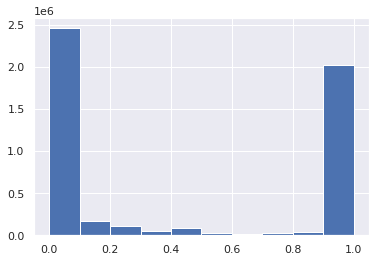

1


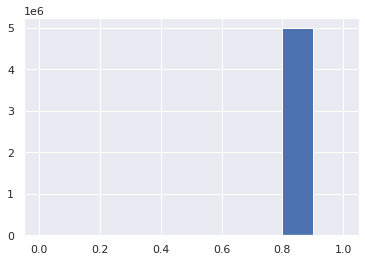

2


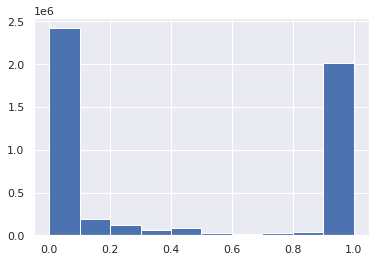

3


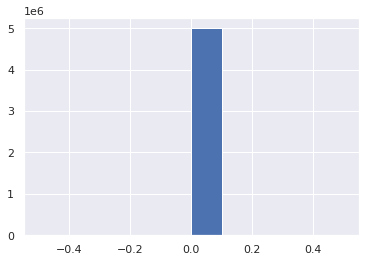

4


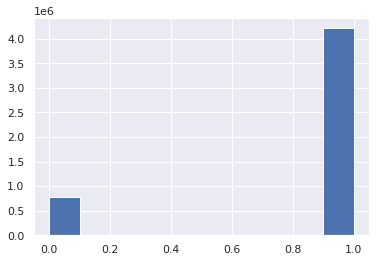

5


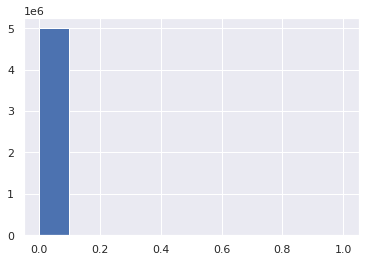

6


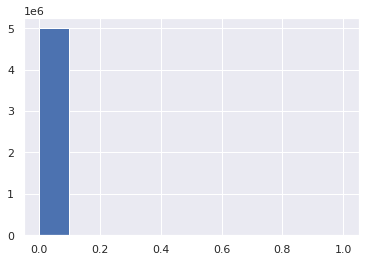

7


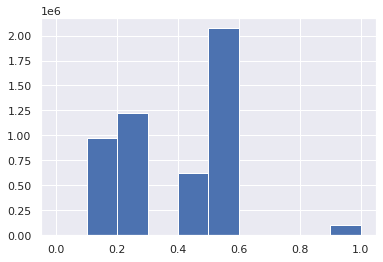

8


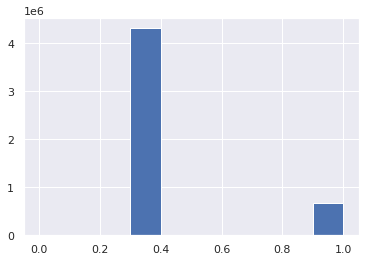

9


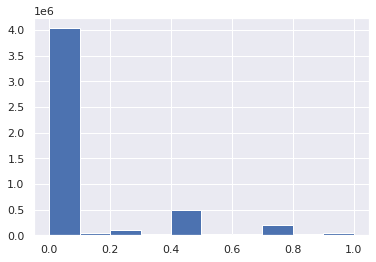

10


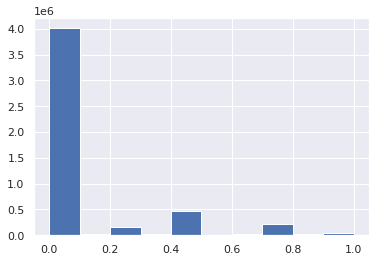

11


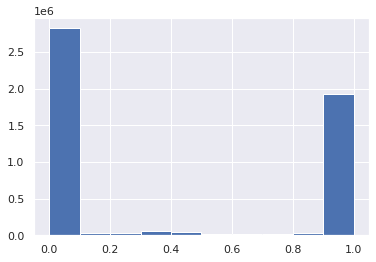

12


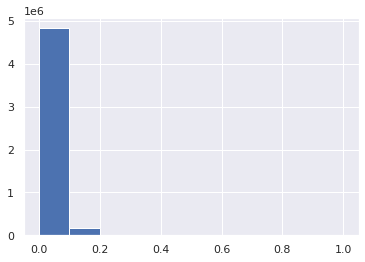

13


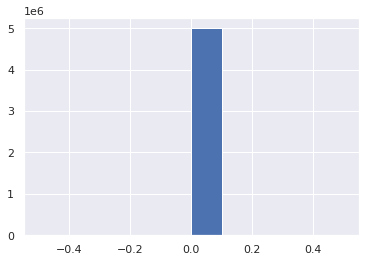

14


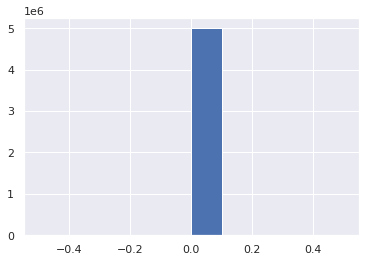

15


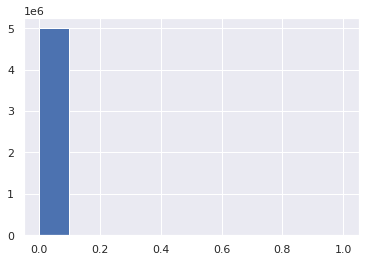

16


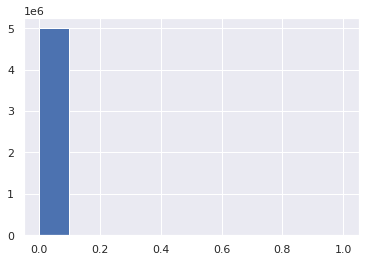

17


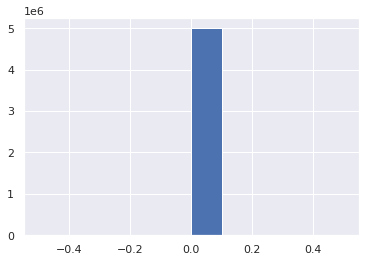

18


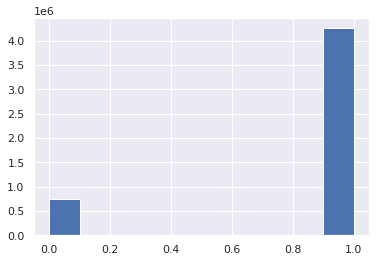

19


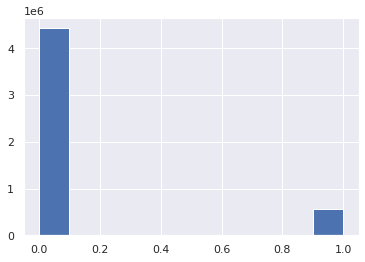

20


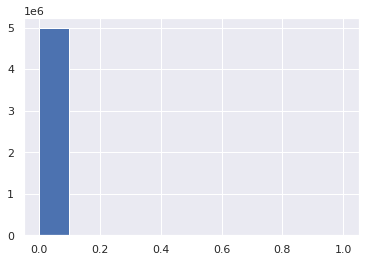

21


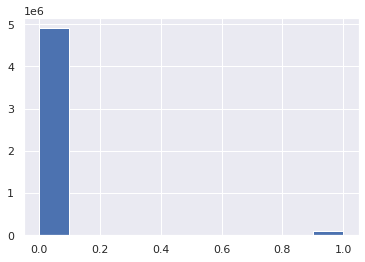

22


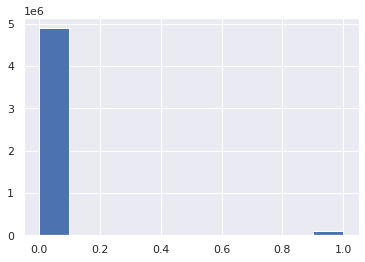

23


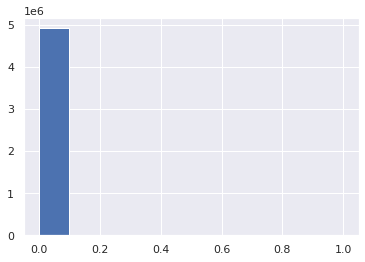

24


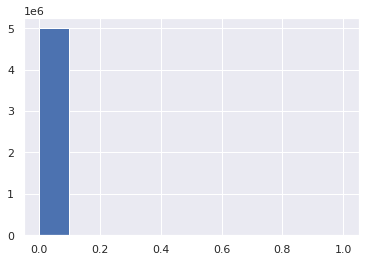

In [ ]:
# visualize a minmax scaler transform of the sonar dataset
from pandas import DataFrame
from matplotlib import pyplot
# convert the array back to a dataframe
dataset = DataFrame(x)
# summarize
# histograms of the variables

for i in range(len(dataset.columns)):
  print(i)
  dataset[i].hist()
  pyplot.show()

In [ ]:
X[10]

array([6.000e+01, 2.000e+01, 4.000e+01, 0.000e+00, 1.000e+00, 0.000e+00,
       0.000e+00, 1.280e+02, 6.000e+00, 3.816e+03, 8.000e+01, 0.000e+00,
       1.381e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.656e+04,
       1.450e-03])

In [ ]:
for i in range(0,len(Y)):
  if Y[i] =="attack":
    Y[i]=1
  else:
    Y[i]=0

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x, Y, test_size = 0.20)

In [ ]:
x_l=X_train.tolist()

In [ ]:
y_l=Y_train.tolist()

In [ ]:
x_a=np.array(x_l)

In [ ]:
y_a=np.array(y_l)

In [ ]:
x_l=[]
y_l=[]

In [ ]:
xt_l=X_test.tolist()

In [ ]:
yt_l=Y_test.tolist()

In [ ]:
xt_a=np.array(xt_l)

In [ ]:
yt_a=np.array(yt_l)

In [ ]:
xt_l=[]
yt_l=[]

In [ ]:
def create_baseline():
    model = Sequential()
    model.add(LSTM(8, activation='relu', return_sequences=True, input_shape=(25, 1)))
    model.add(LSTM(8, activation='relu'))
    
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse', metrics = ['accuracy'])
    
    return model

In [ ]:
model = create_baseline()

In [ ]:
model.fit(x_a,y_a, epochs=10)

Epoch 1/10
125000/125000 [==============================] - 1576s 13ms/step - loss: 0.1129 - accuracy: 0.8488
Epoch 2/10
125000/125000 [==============================] - 1582s 13ms/step - loss: 0.0904 - accuracy: 0.8766
Epoch 3/10
125000/125000 [==============================] - 1612s 13ms/step - loss: 0.0799 - accuracy: 0.8922
Epoch 4/10
125000/125000 [==============================] - 1714s 14ms/step - loss: 0.0813 - accuracy: 0.8903
Epoch 5/10
125000/125000 [==============================] - 1711s 14ms/step - loss: 0.0805 - accuracy: 0.8923
Epoch 6/10
125000/125000 [==============================] - 1641s 13ms/step - loss: 0.0744 - accuracy: 0.8994
Epoch 7/10
125000/125000 [==============================] - 1547s 12ms/step - loss: 0.0735 - accuracy: 0.9003
Epoch 8/10
125000/125000 [==============================] - 1558s 12ms/step - loss: 0.0737 - accuracy: 0.9001
Epoch 9/10
125000/125000 [==============================] - 1564s 13ms/step - loss: 0.0756 - accuracy: 0.8981
Epoch 10/1

In [ ]:
model.save('/content/drive/MyDrive/dataset_attack/module1.tl')


INFO:tensorflow:Assets written to: /content/drive/MyDrive/dataset_attack/module1.tl/assets


In [ ]:
model.fit(x_a,y_a, epochs=1)

125000/125000 [==============================] - 1639s 13ms/step - loss: 0.0723 - accuracy: 0.9016


In [ ]:
test_loss,test_accuracy=model.evaluate(xt_a,yt_a)

31250/31250 [==============================] - 157s 5ms/step - loss: 0.0723 - accuracy: 0.9026


In [ ]:
model.save('/content/drive/MyDrive/dataset_attack/module2.tl')


INFO:tensorflow:Assets written to: /content/drive/MyDrive/dataset_attack/module2.tl/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/dataset_attack/module2.tl/assets


In [ ]:
model = load_model('/content/drive/MyDrive/dataset_attack/module2.tl')

In [ ]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 25, 8)             320       
                                                                 
 lstm_5 (LSTM)               (None, 8)                 544       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 873
Trainable params: 873
Non-trainable params: 0
_________________________________________________________________
None
